# Modified Randomized Hough transform 
### The randomized hough transform is an algorithm used to detect lines and shapes in 2d images 
In this Notebook I will be implenting the algorithm to detect eliptical patterns from a set of points in a three dimensional cartesian coordinate system.

In [1]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt


# Artificial Elipse Test Data Generator
### We create a set of data points in eliptical pattern to test randomized hough transform algorithm, a small deviance is generated to later asses how accurate algorithm performs when noise is present 

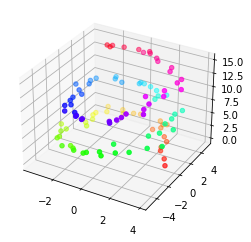

In [2]:
fig = plt.figure()
ax = plt.axes(projection="3d")

z_points = np.linspace(0,15,100)
x_points = 3 * np.cos(z_points) + 0.5 * np.random.randn(100)
y_points = 5 * np.sin(z_points) + 0.1 * np.random.randn(100)
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv')
data = np.column_stack((x_points,y_points,z_points))
plt.show()
plt.close('all')


# The algorithm

In [23]:
#, min_altitutde, max_altitude, grid_unit_size, latitude_distance, longitude_distance
class detectEllipse():
    def __init__(self) -> None:
        self.__minDist = 5
        self.__max_height = 10
    
    def __getCandidateVals(x1, y1,x2,y2):
        midpoint = np.array([(x1 + x2)/2, (y1+y2)/2])
        majAxVal = np.sqrt(np.square(x2-x1)+np.square(y2-y1))/2
        alphaVal = np.arctan((y2-y1)/(x2-x1))
        return {'midpoint':midpoint, 'majAxis': majAxVal, 'alphaVal' :alphaVal}
        
    def __calcVoteVals(x1,y1,x2,y2):
        dist =  np.sqrt(np.square(x2-x1)+np.square(y2-y1))/2
        

    def _ellipseDetector(self,data_points):
        accumulator = np.zeros((8,15))
        print(self.__minDist)


In [22]:
myEllipse = detectEllipse()
myEllipse._ellipseDetector(data)



5


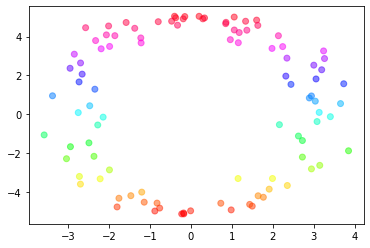

In [5]:

plt.scatter(x_points, y_points,cmap='hsv', c=y_points,alpha=0.5)
plt.show()